In [1]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
import zipfile
from datetime import datetime
from dateutil import parser
import datetime
import ast
import json
# 3rd-party Libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

raw_df = pd.read_csv('matched_pairs_2.csv')
new_df = pd.read_csv('prepost_w_times.csv')


In [2]:
label_to_value = {
    'Definitely true': 6,
    'A little bit false': 4,
    'A little bit true': 3,
    'Mostly true': 5,
    'Mostly false': 2,
    'Definitely false': 1
}

#enjoyed
enjoyed = {
    'Strongly agree': 5,
    'Somewhat agree': 4,
    'Neither agree nor disagree': 3,
    'Somewhat disagree': 2,
    'Strongly disagree': 1
}

#inverse enjoyed
enjoyed_inverse = {
    'Strongly agree': 1,
    'Somewhat agree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat disagree': 4,
    'Strongly disagree': 5
}

# zero center scores
new_df[['Q18_1', 'Q18_2', 'Q18_4', 'Q18_5', 'Q18_6']] = new_df[['Q18_1', 'Q18_2', 'Q18_4', 'Q18_5', 'Q18_6']].replace(enjoyed)

#inverse zero center scores
new_df['Q18_3'] = new_df['Q18_3'].replace(enjoyed_inverse)



# Replace the labels with corresponding values
raw_df[['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.',
        'Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.',
        'Click the button that best describes how true or false each statement is for you. - I consider myself a science person.',
         'Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.',
         'Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.',
        'Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.',
        'Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.',
        'Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.']] = raw_df[['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.',
        'Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.',
        'Click the button that best describes how true or false each statement is for you. - I consider myself a science person.',
         'Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.',
         'Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.',
        'Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.',
        'Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.',
        'Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.']].replace(label_to_value)


In [3]:
print(len(raw_df))
raw_df['Identity'] = raw_df['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I consider myself a science person.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.']

raw_df['Interest'] = raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']

raw_df['Self-efficacy'] = raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']

raw_df['Check'] = raw_df['Identity'] + raw_df['Interest']
raw_df = raw_df[(raw_df['Check'] != 48) & (raw_df['Check'] != 8)]
print(len(raw_df))

new_df['Enjoyment'] = new_df['Q18_1'] + new_df['Q18_2'] + new_df['Q18_3'] + new_df['Q18_4'] + new_df['Q18_5'] + new_df['Q18_6']

402
398


In [4]:

# Assuming you have a DataFrame named raw_df

label_to_value = {
    'Definitely true': 6,
    'A little bit false': 3,
    'A little bit true': 4,
    'Mostly true': 5,
    'Mostly false': 2,
    'Definitely false': 1
}

label_to_value_inverse = {
    6: 1,
    3: 4,
    4: 3,
    5: 2,
    2: 5,
    1: 6
}

# Replace the labels with corresponding values
columns_to_replace = [
    'Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.',
    'Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.',
    'Click the button that best describes how true or false each statement is for you. - I consider myself a science person.',
    'Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.',
    'Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.',
    'Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.',
    'Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.'
]

raw_df[columns_to_replace] = raw_df[columns_to_replace].replace(label_to_value)

# Need to replace inverse labels
raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] = raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'].replace(label_to_value_inverse)


<ipython-input-4-88d4053f7252>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-88d4053f7252>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
raw_df['Identity'] = raw_df['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I consider myself a science person.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.']

raw_df['Interest'] = raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']

raw_df['Self-efficacy'] = raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']


<ipython-input-5-875a5781539a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-875a5781539a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-875a5781539a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
pre_df = raw_df[raw_df['pre=1 post=2'] == 1]
post_df = raw_df[raw_df['pre=1 post=2'] == 2]

In [7]:
new_df_1 = new_df.rename(columns={'Q3': 'userID'})
new_post = post_df.merge(new_df_1[['userID', 'Duration (in seconds)', 'Enjoyment']], on='userID', how='left')
new_post['Duration (in seconds)'] = new_post['Duration (in seconds)'].astype(int)


In [8]:
data = new_post['Duration (in seconds)']
data = np.sort(data)

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
Q2 = np.percentile(data, 50)

IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
higher = Q3 + (1.5 * IQR)
print(lower, higher, Q2)
len(new_post)

51.0 2987.0 1548.0


197

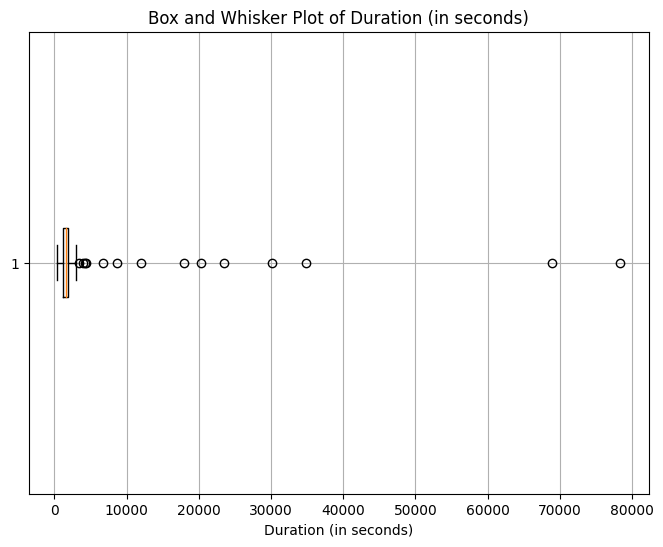

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(new_post['Duration (in seconds)'], vert=False)

plt.title('Box and Whisker Plot of Duration (in seconds)')
plt.xlabel('Duration (in seconds)')
plt.grid(True)
plt.show()

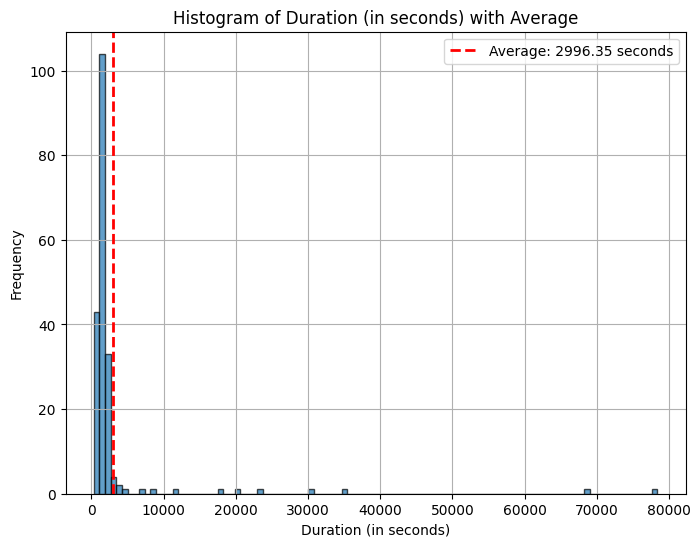

In [10]:
duration_data = new_post['Duration (in seconds)']

average_duration = sum(duration_data) / len(duration_data)

plt.figure(figsize=(8, 6))
plt.hist(duration_data, bins=100, edgecolor='black', alpha=0.7)
plt.axvline(average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_duration:.2f} seconds')

plt.title('Histogram of Duration (in seconds) with Average')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

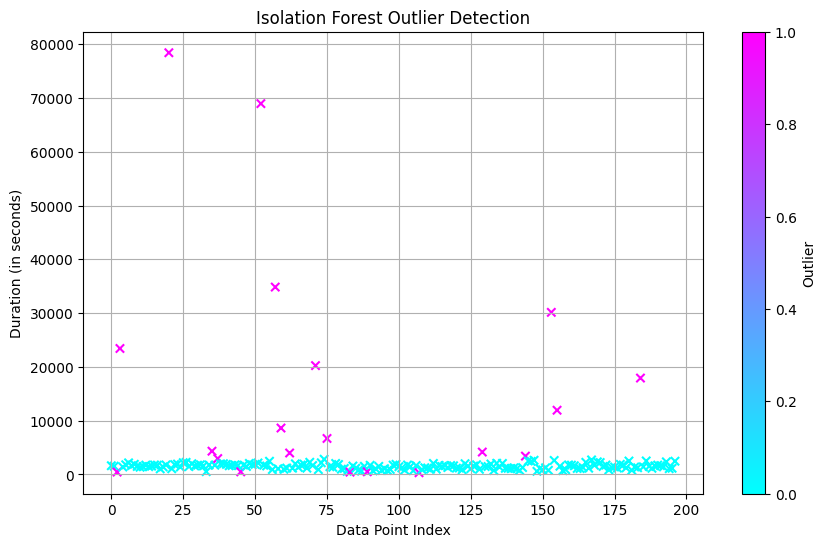

In [11]:
from sklearn.ensemble import IsolationForest

data = new_post['Duration (in seconds)'].values.reshape(-1, 1)
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(data)
outliers = clf.predict(data)
outliers_mask = outliers == -1
outliers_df = pd.DataFrame({'Duration (in seconds)': data.flatten(), 'IsOutlier': outliers_mask})

plt.figure(figsize=(10, 6))
plt.scatter(new_post.index, data, c=outliers_mask, cmap='cool', marker='x')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Data Point Index')
plt.ylabel('Duration (in seconds)')
plt.colorbar(label='Outlier')
plt.grid(True)
plt.show()

new_post_filtered = new_post[~outliers_df['IsOutlier']]


In [12]:
print(len(pre_df), len(new_post))

201 197


#Filtering
As we raise the threshold for time, Total score and most other categories gain a more significant p value

In [13]:
filtered_pre = pre_df[pre_df['Krystal heard a news story about a new fish called Asian silver carp that has come into Lake Erie. In the news story, Krystal learned that Asian silver carp eat small plants and animals. Even though Asian silver carp do not eat other fish, they are still causing the populations of some fish to change in the lake. She found a data table on the change in populations of three different fish after the Asian silver carp came into Lake Erie.\n     \n\n\n\nUse the patterns in the data table to write a scientific explanation on whether the Asian silver carp affect the different fish populations in Lake Erie in the same way.\n\n\n\nYour explanation should include:\n\n1. A claim that states whether the Asian silver carp will affect all the fish (shad, shiner, and smallmouth bass) in the same way.\n\n2. Evidence from the data table about how the Asian silver carp affects the population of shad, shiner, and smallmouth bass.\n\n3. Reasoning that describes the types of relationships that exists between the Asian silver carp and the three fish in the data table.'] != '0']
filtered_post = new_post[new_post['Krystal heard a news story about a new fish called Asian silver carp that has come into Lake Erie. In the news story, Krystal learned that Asian silver carp eat small plants and animals. Even though Asian silver carp do not eat other fish, they are still causing the populations of some fish to change in the lake. She found a data table on the change in populations of three different fish after the Asian silver carp came into Lake Erie.\n     \n\n\n\nUse the patterns in the data table to write a scientific explanation on whether the Asian silver carp affect the different fish populations in Lake Erie in the same way.\n\n\n\nYour explanation should include:\n\n1. A claim that states whether the Asian silver carp will affect all the fish (shad, shiner, and smallmouth bass) in the same way.\n\n2. Evidence from the data table about how the Asian silver carp affects the population of shad, shiner, and smallmouth bass.\n\n3. Reasoning that describes the types of relationships that exists between the Asian silver carp and the three fish in the data table.'] != '0']
filtered_post = filtered_post[
    (filtered_post['Duration (in seconds)'] > 600) &
    (filtered_post['Duration (in seconds)'] < 10000000)
]

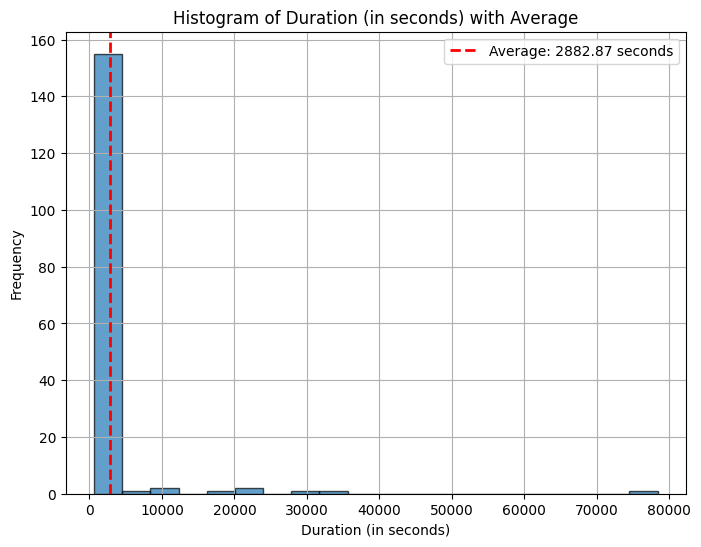

In [14]:
duration_data = filtered_post['Duration (in seconds)']

average_duration = sum(duration_data) / len(duration_data)

plt.figure(figsize=(8, 6))
plt.hist(duration_data, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_duration:.2f} seconds')

plt.title('Histogram of Duration (in seconds) with Average')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(len(filtered_pre), len(filtered_post))

178 164


In [16]:
paired_df = pd.merge(filtered_pre, filtered_post, on='userID', how='inner')
len(paired_df)

152

In [17]:
pre_paired = paired_df[paired_df['pre=1 post=2_x'] == 1]
post_paired = paired_df[paired_df['pre=1 post=2_y'] == 2]

JG_pre = pre_paired[pre_paired['teacher_x'] == 'JG']
JG_post = post_paired[post_paired['teacher_y'] == 'JG']

JS_pre = pre_paired[pre_paired['teacher_x'] == 'JS']
JS_post = post_paired[post_paired['teacher_y'] == 'JS']

ML_pre = pre_paired[pre_paired['teacher_x'] == 'ML']
ML_post = post_paired[post_paired['teacher_y'] == 'ML']

RB_pre = pre_paired[pre_paired['teacher_x'] == 'RB']
RB_post = post_paired[post_paired['teacher_y'] == 'RB']

wo_rb_pre = pre_paired[pre_paired['teacher_x'] != 'RB']
wo_rb_post = post_paired[post_paired['teacher_y'] != 'RB']

##Histograms for normalcy

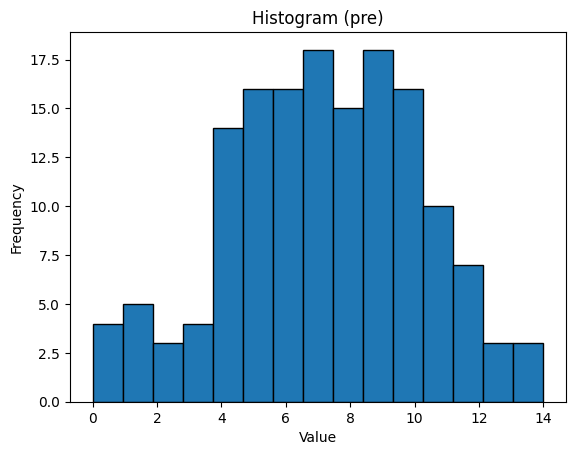

7.223684210526316


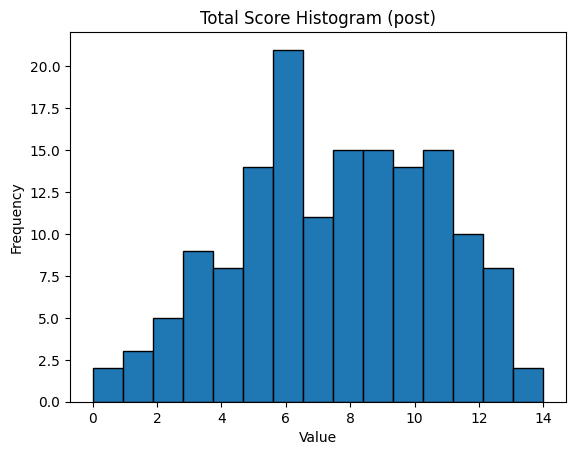

7.6118421052631575


In [18]:
plt.hist(pre_paired['Total Score_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (pre)')
plt.show()
print(pre_paired['Total Score_x'].mean())
plt.hist(post_paired['Total Score_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Total Score Histogram (post)')
plt.show()
print(post_paired['Total Score_y'].mean())

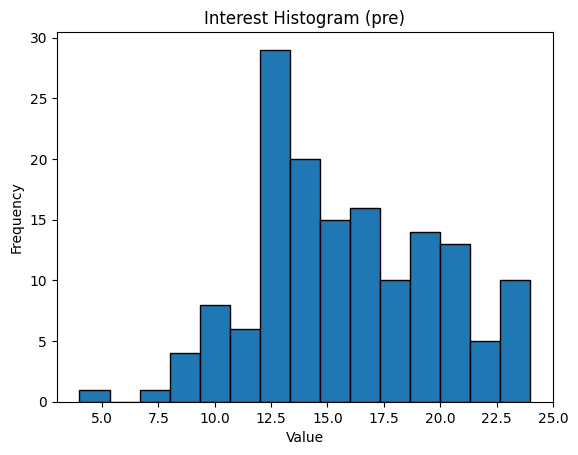

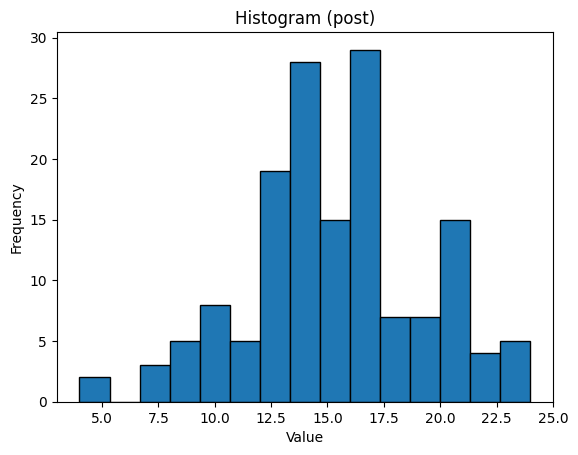

15.657894736842104
15.144736842105264


In [19]:
plt.hist(pre_paired['Interest_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Interest Histogram (pre)')
plt.show()
plt.hist(post_paired['Interest_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Interest_x'].mean())
print(post_paired['Interest_y'].mean())


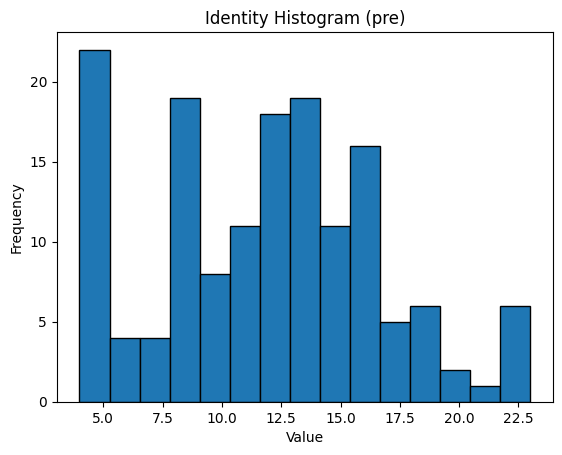

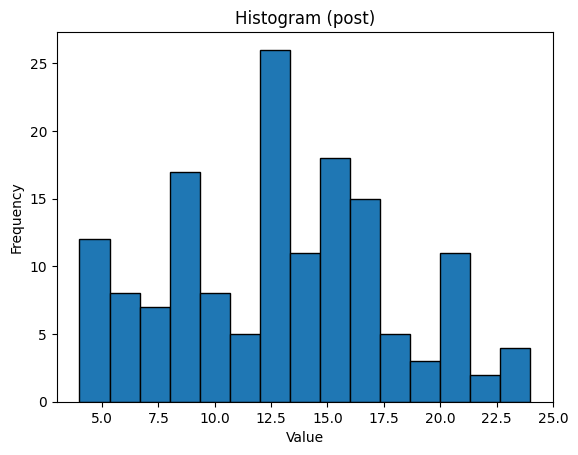

11.81578947368421
12.664473684210526


In [20]:
plt.hist(pre_paired['Identity_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Identity Histogram (pre)')
plt.show()
plt.hist(post_paired['Identity_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Identity_x'].mean())
print(post_paired['Identity_y'].mean())


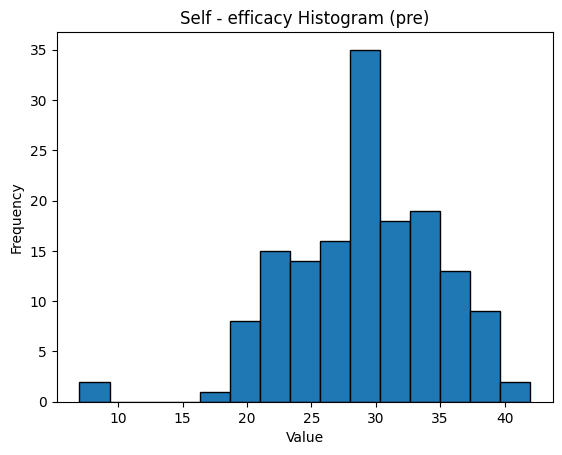

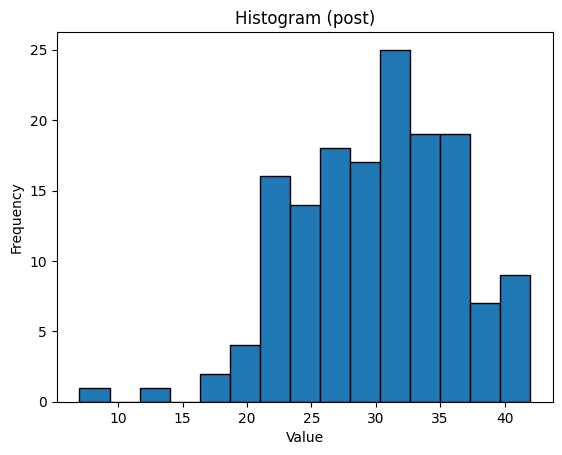

28.888157894736842
29.901315789473685


In [21]:
plt.hist(pre_paired['Self-efficacy_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Self - efficacy Histogram (pre)')
plt.show()
plt.hist(post_paired['Self-efficacy_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Self-efficacy_x'].mean())
print(post_paired['Self-efficacy_y'].mean())


##T Tests (pairwise)

In [22]:
def ttest(pre, post):
    print(f"Total Score: {ttest_rel(pre['Total Score_x'], post['Total Score_y'])}\n")
    p_value_sc = ttest_rel(pre['Total Score_x'], post['Total Score_y'])[1]
    print(f"Identity: {ttest_rel(pre['Identity_x'], post['Identity_y'])}\n")
    p_value_id = ttest_rel(pre['Identity_x'], post['Identity_y'])[1]
    print(f"Self efficacy: {ttest_rel(pre['Self-efficacy_x'], post['Self-efficacy_y'])}\n")
    p_value_se = ttest_rel(pre['Self-efficacy_x'], post['Self-efficacy_y'])[1]
    print(f"Interest: {ttest_rel(pre['Interest_x'], post['Interest_y'])}\n")
    p_value_int = ttest_rel(pre['Interest_x'], post['Interest_y'])[1]
    print(f"Mean Total Score Pre/Post: {pre['Total Score_x'].mean(), post['Total Score_y'].mean()}\n")
    print(f"Mean Identity Pre/Post: {pre['Identity_x'].mean(), post['Identity_y'].mean()}\n")
    print(f"Mean Self-efficacy Pre/Post: {pre['Self-efficacy_x'].mean(), post['Self-efficacy_y'].mean()}\n")
    print(f"Mean Interest Pre/Post: {pre['Interest_x'].mean(), post['Interest_y'].mean()}\n")
    total_score_means = [pre['Total Score_x'].mean(), post['Total Score_y'].mean()]
    identity_means = [pre['Identity_x'].mean(), post['Identity_y'].mean()]
    self_efficacy_means = [pre['Self-efficacy_x'].mean(), post['Self-efficacy_y'].mean()]
    interest_means = [pre['Interest_x'].mean(), post['Interest_y'].mean()]

    # Create lists for the labels and positions
    labels = ['Pre', 'Post']
    x = range(len(labels))

    # Create the side-by-side bar graph
    width = 0.2  # Width of the bars

    plt.bar(x, total_score_means, width, label='Total Score')
    plt.bar([i + width for i in x], identity_means, width, label='Identity')
    plt.bar([i + width * 2 for i in x], self_efficacy_means, width, label='Self-efficacy')
    plt.bar([i + width * 3 for i in x], interest_means, width, label='Interest')

    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.title('Averages by Time')
    plt.xticks([i + width for i in x], labels)
    plt.legend()
    plt.show()
    return p_value_sc, p_value_id, p_value_se, p_value_int


Total Score: TtestResult(statistic=-1.986745222173906, pvalue=0.0487600202721307, df=151)

Identity: TtestResult(statistic=-3.1317671821075974, pvalue=0.002087067190704136, df=151)

Self efficacy: TtestResult(statistic=-2.0922646408345447, pvalue=0.03808803934523065, df=151)

Interest: TtestResult(statistic=1.8778426885684365, pvalue=0.06233105878819897, df=151)

Mean Total Score Pre/Post: (7.223684210526316, 7.6118421052631575)

Mean Identity Pre/Post: (11.81578947368421, 12.664473684210526)

Mean Self-efficacy Pre/Post: (28.888157894736842, 29.901315789473685)

Mean Interest Pre/Post: (15.657894736842104, 15.144736842105264)



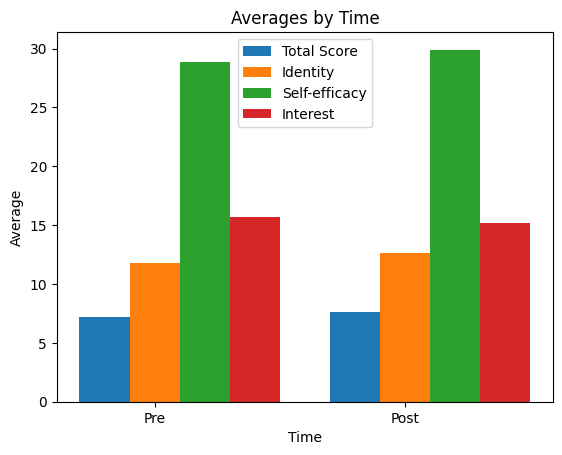

In [23]:
# After filtering was done
p_value_sc, p_value_id, p_value_se, p_value_int = ttest(pre_paired, post_paired)


Total Score: TtestResult(statistic=1.5389966336213579, pvalue=0.1374507554363131, df=23)

Identity: TtestResult(statistic=-1.9171673257296318, pvalue=0.06772080852673093, df=23)

Self efficacy: TtestResult(statistic=-1.9443229057164684, pvalue=0.06418660526280164, df=23)

Interest: TtestResult(statistic=1.6067122484821708, pvalue=0.1217607308862901, df=23)

Mean Total Score Pre/Post: (8.541666666666666, 7.625)

Mean Identity Pre/Post: (11.458333333333334, 12.5)

Mean Self-efficacy Pre/Post: (29.916666666666668, 32.291666666666664)

Mean Interest Pre/Post: (15.666666666666666, 14.541666666666666)



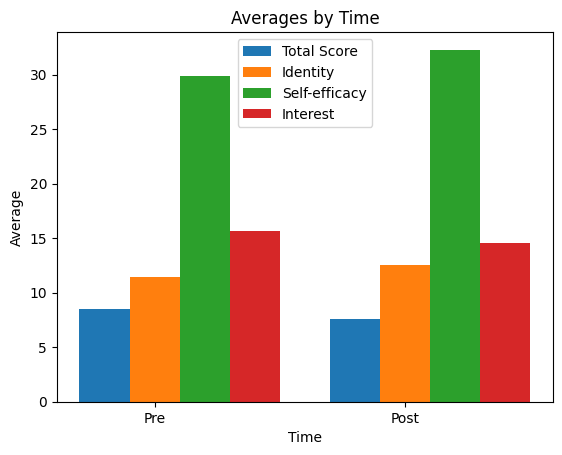

(0.1374507554363131,
 0.06772080852673093,
 0.06418660526280164,
 0.1217607308862901)

In [24]:
# Teacher: JG
ttest(JG_pre, JG_post)

Total Score: TtestResult(statistic=-1.9621048979129168, pvalue=0.06381658602771423, df=20)

Identity: TtestResult(statistic=-1.599763015624857, pvalue=0.12532975661656964, df=20)

Self efficacy: TtestResult(statistic=-1.0323041025920383, pvalue=0.31425212339903985, df=20)

Interest: TtestResult(statistic=-0.650256088762355, pvalue=0.5229268944212824, df=20)

Mean Total Score Pre/Post: (6.571428571428571, 7.523809523809524)

Mean Identity Pre/Post: (12.857142857142858, 13.714285714285714)

Mean Self-efficacy Pre/Post: (28.333333333333332, 29.666666666666668)

Mean Interest Pre/Post: (15.666666666666666, 16.142857142857142)



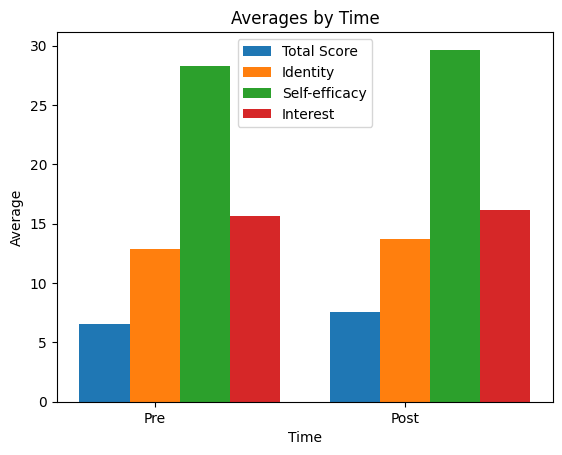

(0.06381658602771423,
 0.12532975661656964,
 0.31425212339903985,
 0.5229268944212824)

In [25]:
# Teacher: JS
ttest(JS_pre, JS_post)

Total Score: TtestResult(statistic=-2.7020476909099456, pvalue=0.009618962607868486, df=46)

Identity: TtestResult(statistic=-1.6424512485599396, pvalue=0.10731620370899171, df=46)

Self efficacy: TtestResult(statistic=-2.5263569151992327, pvalue=0.015030322424753023, df=46)

Interest: TtestResult(statistic=0.8169717877170916, pvalue=0.41815575452283316, df=46)

Mean Total Score Pre/Post: (7.25531914893617, 8.148936170212766)

Mean Identity Pre/Post: (11.170212765957446, 11.893617021276595)

Mean Self-efficacy Pre/Post: (27.76595744680851, 29.72340425531915)

Mean Interest Pre/Post: (14.893617021276595, 14.51063829787234)



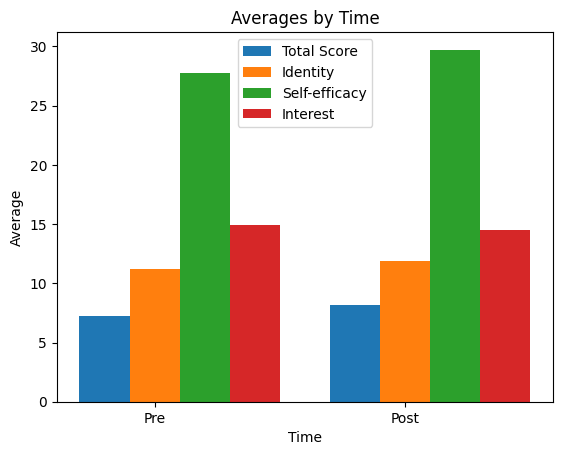

(0.009618962607868486,
 0.10731620370899171,
 0.015030322424753023,
 0.41815575452283316)

In [26]:
# Teacher: ML
ttest(ML_pre, ML_post)

Total Score: TtestResult(statistic=-1.1160772371666747, pvalue=0.26891404549282966, df=59)

Identity: TtestResult(statistic=-1.6463947704337072, pvalue=0.10499959359035939, df=59)

Self efficacy: TtestResult(statistic=0.4700651737055718, pvalue=0.6400413826012215, df=59)

Interest: TtestResult(statistic=1.6000501623170935, pvalue=0.1149291847561365, df=59)

Mean Total Score Pre/Post: (6.9, 7.216666666666667)

Mean Identity Pre/Post: (12.1, 12.966666666666667)

Mean Self-efficacy Pre/Post: (29.55, 29.166666666666668)

Mean Interest Pre/Post: (16.25, 15.533333333333333)



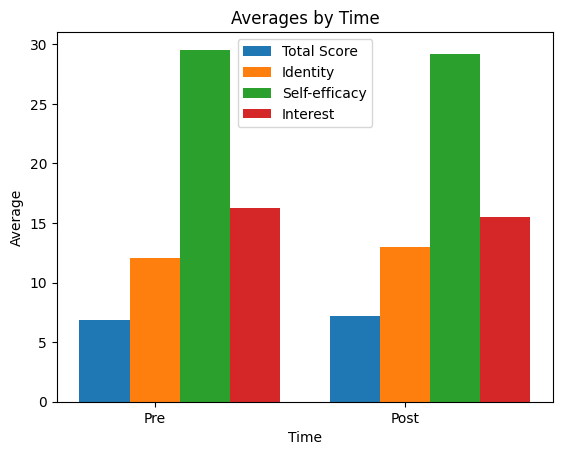

(0.26891404549282966,
 0.10499959359035939,
 0.6400413826012215,
 0.1149291847561365)

In [27]:
# Teacher: RB
ttest(RB_pre, RB_post)


#Enjoyment

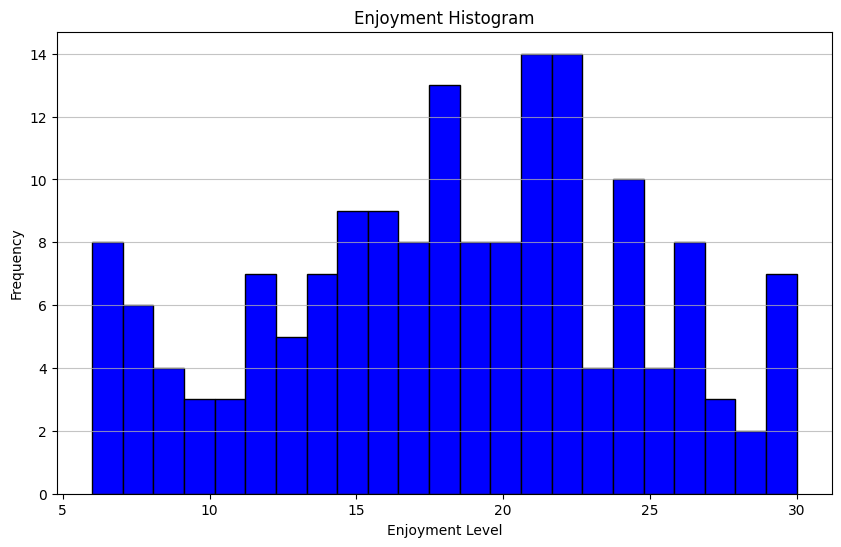

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(filtered_post['Enjoyment'], bins=23, color='blue', edgecolor='black')
plt.title('Enjoyment Histogram')
plt.xlabel('Enjoyment Level')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

In [29]:
quartiles = filtered_post['Enjoyment'].quantile([0.25, 0.5, 0.75])

# Rename the index to represent quartiles
quartiles.index = ['Q1', 'Q2 (Median)', 'Q3']

# Display the quartiles
print(quartiles)

Q1             14.0
Q2 (Median)    18.5
Q3             22.0
Name: Enjoyment, dtype: object


In [30]:
#filter for enjoyment
post_done_enjoy = filtered_post[filtered_post['Enjoyment'] >= 22]
post_done_no_enjoy = filtered_post[filtered_post['Enjoyment'] <= 15]

print(f'test length enjoy: {len(post_done_enjoy)}, test length less enjoyment {len(post_done_no_enjoy)}')

test length enjoy: 52, test length less enjoyment 52


In [31]:
enjoy_paired_df = pd.merge(filtered_pre, post_done_enjoy, on='userID', how='inner')
no_enjoy_paired_df = pd.merge(filtered_pre, post_done_no_enjoy, on = 'userID', how='inner')
def print_tests(df):
    # Perform t-tests
    print(f"Total Score: {ttest_rel(df['Total Score_x'], df['Total Score_y'])}\n")
    p_v_score = ttest_rel(df['Total Score_x'], df['Total Score_y'])[1]
    print(f"Identity: {ttest_rel(df['Identity_x'], df['Identity_y'])}\n")
    p_v_identity = ttest_rel(df['Identity_x'], df['Identity_y'])[1]
    print(f"Self efficacy: {ttest_rel(df['Self-efficacy_x'], df['Self-efficacy_y'])}\n")
    p_v_se = ttest_rel(df['Self-efficacy_x'], df['Self-efficacy_y'])[1]
    print(f"Interest: {ttest_rel(df['Interest_x'], df['Interest_y'])}\n")
    p_v_interest = ttest_rel(df['Interest_x'], df['Interest_y'])[1]
    print(f"Total Score average (pre/post: {df['Total Score_x'].mean(), df['Total Score_y'].mean()}\n")
    print(f"Identity averages (pre/post): {df['Identity_x'].mean(), df['Identity_y'].mean()}\n")
    print(f"Self efficacy averages (pre/post): {df['Self-efficacy_x'].mean(), df['Self-efficacy_y'].mean()}\n")
    print(f"Interest average (pre/post): {df['Interest_x'].mean(), df['Interest_y'].mean()}\n")
    total_score_means = [df['Total Score_x'].mean(), df['Total Score_y'].mean()]
    identity_means = [df['Identity_x'].mean(), df['Identity_y'].mean()]
    self_efficacy_means = [df['Self-efficacy_x'].mean(), df['Self-efficacy_y'].mean()]
    interest_means = [df['Interest_x'].mean(), df['Interest_y'].mean()]

    # Create lists for the labels and positions
    labels = ['Pre', 'Post']
    x = range(len(labels))

    # Create the side-by-side bar graph
    width = 0.2  # Width of the bars

    plt.bar(x, total_score_means, width, label='Total Score')
    plt.bar([i + width for i in x], identity_means, width, label='Identity')
    plt.bar([i + width * 2 for i in x], self_efficacy_means, width, label='Self-efficacy')
    plt.bar([i + width * 3 for i in x], interest_means, width, label='Interest')

    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.title('Averages by Time')
    plt.xticks([i + width for i in x], labels)
    plt.legend()
    plt.show()

    return p_v_score, p_v_identity, p_v_se, p_v_interest

Total Score: TtestResult(statistic=-1.9802950859533486, pvalue=0.05341799547386496, df=48)

Identity: TtestResult(statistic=-2.476765127392508, pvalue=0.016833426342294042, df=48)

Self efficacy: TtestResult(statistic=-2.687501387560139, pvalue=0.00986353613416483, df=48)

Interest: TtestResult(statistic=1.26881751672005, pvalue=0.2106247932905127, df=48)

Total Score average (pre/post: (7.979591836734694, 8.693877551020408)

Identity averages (pre/post): (13.571428571428571, 14.448979591836734)

Self efficacy averages (pre/post): (29.959183673469386, 32.16326530612245)

Interest average (pre/post): (17.040816326530614, 16.428571428571427)



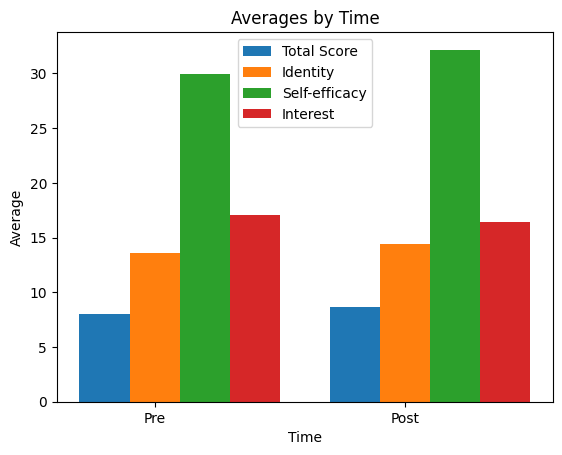

0.05341799547386496 0.016833426342294042 0.00986353613416483 0.2106247932905127


In [32]:
#enjoyed
p_v_score, p_v_identity, p_v_se, p_v_interest = print_tests(enjoy_paired_df)
print(p_v_score, p_v_identity, p_v_se, p_v_interest)


Total Score: TtestResult(statistic=0.1236548417073745, pvalue=0.9021392426566801, df=45)

Identity: TtestResult(statistic=0.22804184191524723, pvalue=0.8206467584148956, df=45)

Self efficacy: TtestResult(statistic=0.0, pvalue=1.0, df=45)

Interest: TtestResult(statistic=3.222921721136988, pvalue=0.002362132106039195, df=45)

Total Score average (pre/post: (6.739130434782608, 6.695652173913044)

Identity averages (pre/post): (10.347826086956522, 10.217391304347826)

Self efficacy averages (pre/post): (27.58695652173913, 27.58695652173913)

Interest average (pre/post): (14.934782608695652, 13.41304347826087)



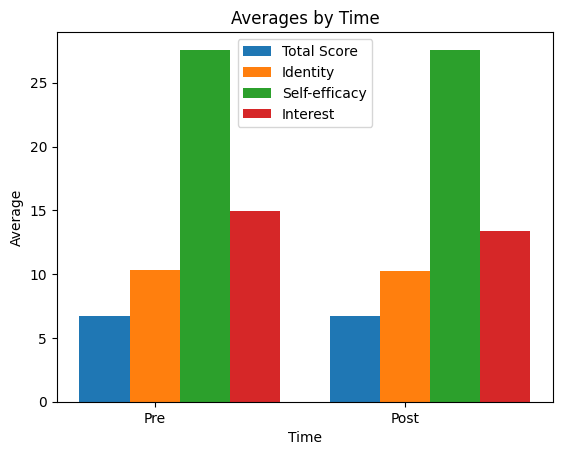

0.9021392426566801 0.8206467584148956 1.0 0.002362132106039195


In [33]:
#less enjoyment
p_v_scor, p_v_identit, p_v_s, p_v_interes = print_tests(no_enjoy_paired_df)
print(p_v_scor, p_v_identit, p_v_s, p_v_interes)

In [34]:
print(no_enjoy_paired_df['Self-efficacy_x'], no_enjoy_paired_df['Self-efficacy_y'])
print(no_enjoy_paired_df['Self-efficacy_x'].sum(), no_enjoy_paired_df['Self-efficacy_y'].sum())

0     22
1     31
2     20
3     33
4     35
5     29
6     21
7     29
8     36
9     30
10    32
11    38
12    25
13    22
14    31
15    20
16    26
17    23
18    26
19    32
20    25
21    30
22    28
23    22
24    28
25    33
26    28
27    36
28     7
29    20
30    26
31    38
32    32
33    28
34    37
35    20
36    32
37    19
38    17
39    25
40    28
41    24
42    28
43    33
44    25
45    39
Name: Self-efficacy_x, dtype: int64 0     20
1     32
2     26
3     34
4     37
5     25
6     20
7     33
8     26
9     30
10    37
11    36
12    36
13    27
14    28
15    24
16    22
17    23
18    26
19    26
20    26
21    25
22    27
23    32
24    33
25    37
26    32
27    31
28    24
29    24
30    33
31    31
32    32
33    23
34    34
35    22
36     7
37    25
38    21
39    28
40    22
41    21
42    24
43    31
44    31
45    25
Name: Self-efficacy_y, dtype: int64
1269 1269


In [35]:
#correction, includes everyone, enjoyed, and no enjoyment
list_p_values = [p_value_sc, p_value_id, p_value_se, p_value_int, p_v_score, p_v_identity, p_v_se, p_v_interest, p_v_scor, p_v_identit, p_v_s, p_v_interes]

In [36]:
#bonferoni
np.array(list_p_values) * len(list_p_values)

array([ 0.58512024,  0.02504481,  0.45705647,  0.74797271,  0.64101595,
        0.20200112,  0.11836243,  2.52749752, 10.82567091,  9.8477611 ,
       12.        ,  0.02834559])

In [37]:
#benjamin hotchberg false discovery rate
from scipy import stats
stats.false_discovery_control(list_p_values)

array([0.09157371, 0.01417279, 0.09141129, 0.09349659, 0.09157371,
       0.05050028, 0.03945414, 0.28083306, 0.9841519 , 0.9841519 ,
       1.        , 0.01417279])